# **Mount the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the required lib**

In [2]:
import pandas as pd

# **load dataset into pandas Dataframe**

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Data Standardization Section
from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width','petal length','petal width']

In [6]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
#Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
# PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

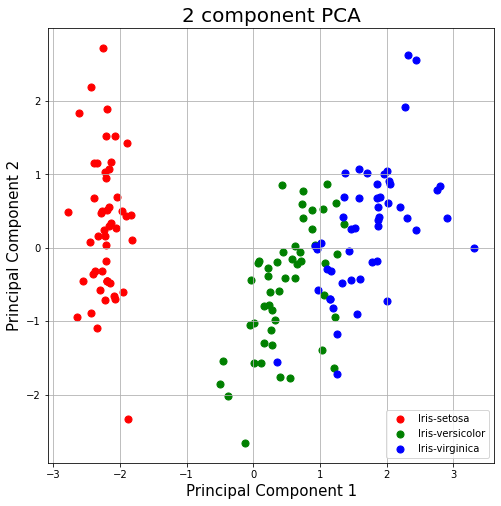

In [9]:
# Visualize 2D Projection
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()   

In [10]:
# Explained Variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


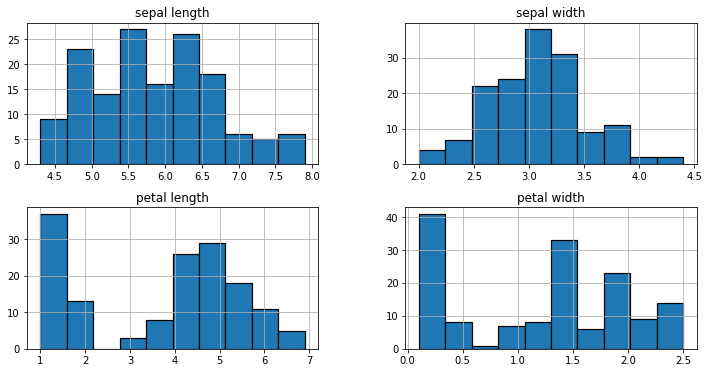

In [12]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [13]:
import seaborn as sns

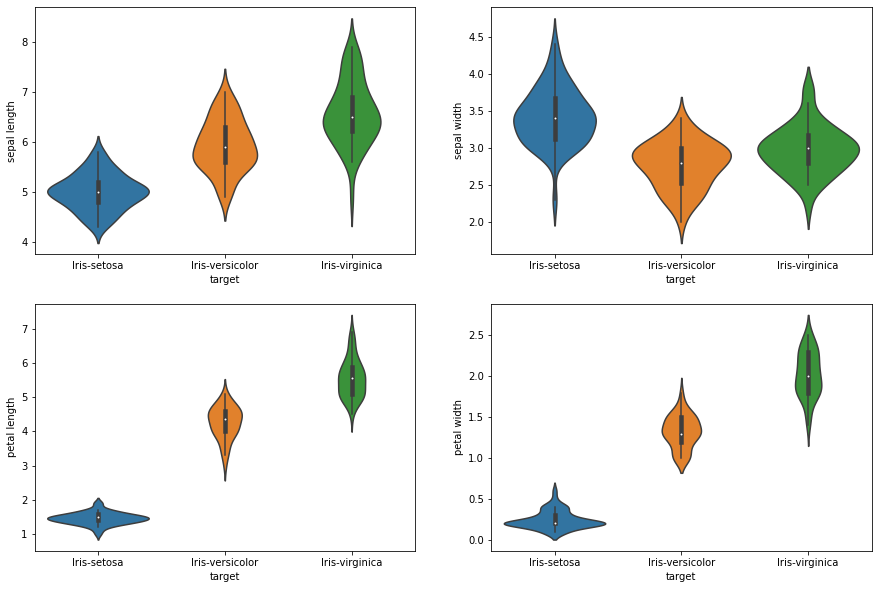

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target', y = 'sepal length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target', y = 'sepal width', data=df)

plt.subplot(2,2,3)
sns.violinplot(x='target', y = 'petal length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target', y = 'petal width', data=df)

In [15]:
df.shape

(150, 5)

In [16]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

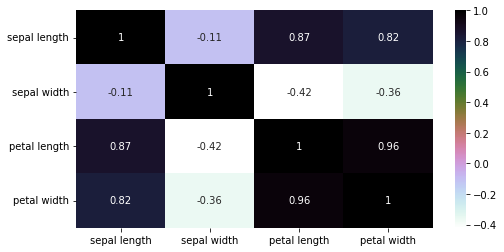

In [17]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by df.corr() 
plt.show()

In [18]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y = df['target']

In [19]:
train, test = train_test_split(df, test_size = 0.3, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [20]:
X_train = df[['sepal length','sepal width','petal length','petal width']] # taking the training data features
y_train = df.target # output of the training data

X_test = df[['sepal length','sepal width','petal length','petal width']] # taking test data feature
y_test = df.target # output value of the test data

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Logistic Regression is:  0.9733333333333334


In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 1.0


In [23]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, y_test)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9733333333333334
